In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
import statistics

In [7]:
# 可以先去學離散機率，淺顯易懂 https://www.coursera.org/lecture/prob1/4-5-b-li-san-ji-lu-fen-bu-ii-zhong-c2663
#想知道累積到成功第三次的機率是多少

p = 0.2
k = 3

# 一開始不知道r的可能區間：不知道累積成功三次的實驗次數會介於幾次到幾次之間，所以先用ppf去求（ppf為cdf百分位數對應的值）
r = np.arange(stats.nbinom.ppf(0.01,k, p), stats.nbinom.ppf(0.99, k, p))
r

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35.])

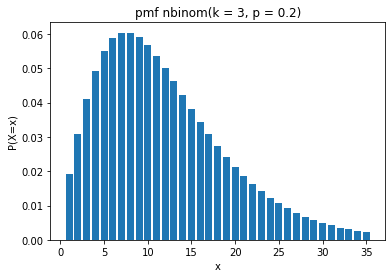

array([0.0192    , 0.03072   , 0.04096   , 0.049152  , 0.05505024,
       0.05872026, 0.06039798, 0.06039798, 0.0590558 , 0.05669357,
       0.05360119, 0.05002778, 0.04617949, 0.04222125, 0.0382806 ,
       0.03445254, 0.03080462, 0.02738189, 0.02421135, 0.02130599,
       0.01866811, 0.01629216, 0.0141671 , 0.01227815, 0.01060832,
       0.00913948, 0.00785318, 0.0067313 , 0.00575642, 0.00491215,
       0.00418325, 0.00355576, 0.00301701, 0.00255558, 0.00216129])

In [10]:
probs = stats.nbinom.pmf(r,k, p)
plt.bar(r, probs)
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.title('pmf nbinom(k = 3, p = 0.2)')
plt.show()
probs

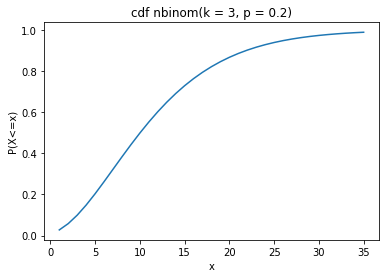

In [11]:
cum_sum = stats.nbinom.cdf(r,k ,p)
plt.plot(r, cum_sum)
plt.xlabel('x')
plt.ylabel('P(X<=x)')
plt.title('cdf nbinom(k = 3, p = 0.2)')
plt.show()

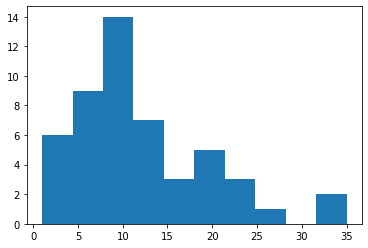

array([14,  3,  7, 13, 10, 13, 11, 14, 10, 33, 21, 19,  8, 13,  1,  9,  6,
       13,  8, 14,  9,  5,  6,  9, 28,  4, 11,  8, 15, 20,  7, 20,  4, 11,
        1, 15,  9, 22, 24, 16,  7,  9,  5,  2,  5, 21,  5,  8, 22, 35])

In [14]:
X = stats.nbinom.rvs(k,p, size = 50)
plt.hist(X)
plt.show()
X

In [15]:
mvks = stats.nbinom.stats(k, p, moments = 'mvks')
mvks

(array(12.), array(60.), array(1.161895), array(2.01666667))

In [19]:
#總共50個骰子，有10個是紅色的，取20個骰子不放回，取到x個紅色骰子的機率為何？

N = 50
k = 30
n = 20

r = np.arange(0, min(n+1, k+1))
r


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

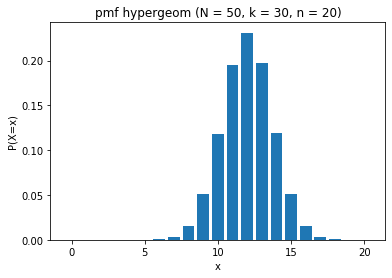

In [20]:
probs = stats.hypergeom.pmf(r, N, k, n )
plt.bar(r, probs)
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.title('pmf hypergeom (N = 50, k = 30, n = 20)')
plt.show()

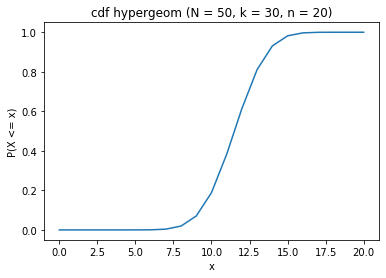

In [21]:
cum_sum = stats.hypergeom.cdf(r, N, k, n)
plt.plot(r, cum_sum)
plt.xlabel('x')
plt.ylabel('P(X <= x)')
plt.title('cdf hypergeom (N = 50, k = 30, n = 20)')
plt.show()

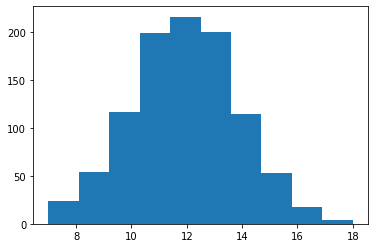

In [24]:
X = stats.hypergeom.rvs( N,k , n, size = 1000 )
plt.hist(X)
plt.show()

In [26]:
mvks = stats.hypergeom.stats(N, k, n, moments = 'mkvs')
mvks

(array(12.), array(2.93877551), array(-0.02430556), array(-0.05243425))